In [ ]:
# https://github.com/networkx/networkx/issues/7101
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="networkx backend defined more than once: nx-loopback")
    import networkx as nx

In [1]:
#!pip install install dowhy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from dowhy import CausalModel
import dowhy.datasets
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

/Users/jbanerje/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jbanerje/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000,
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]

In [4]:
for key in data:
    if key != 'df':
     print(key, "->", data[key])

treatment_name -> ['v0']
outcome_name -> y
common_causes_names -> ['W0', 'W1', 'W2', 'W3', 'W4']
instrument_names -> ['Z0', 'Z1']
effect_modifier_names -> ['X0']
frontdoor_variables_names -> []
dot_graph -> digraph {v0->y;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;X0-> y;}
gml_graph -> graph[directed 1node[ id "y" label "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "Z0" label "Z0"] node[ id "Z1" label "Z1"]node[ id "v0" label "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "Z0" target "v0"] edge[ source "Z1" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W4" target "y"]node[ id "X0" label 

In [5]:
# Without graph
model= CausalModel(
        data=df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        common_causes=data["common_causes_names"],
        effect_modifiers=data["effect_modifier_names"])


In [6]:
model.summary()

"Model to find the causal effect of treatment ['v0'] on outcome ['y']"

In [7]:
#model.get_common_causes()
#model.get_effect_modifiers()
model.get_instruments()


In [8]:
df

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,1.127164,1.0,0.106817,-0.468406,-0.900753,0.226735,1.863984,2,True,21.562107
1,-0.352279,0.0,0.821900,-0.408224,-2.151098,-0.501759,1.221351,1,True,11.286231
2,0.084297,1.0,0.631240,-0.137716,-0.766173,2.532879,-0.110311,0,True,13.216467
3,-0.533467,0.0,0.834208,-0.812254,0.823549,0.628593,-0.252159,2,True,8.291699
4,0.832905,1.0,0.576228,0.535954,-1.673508,-0.347170,0.886444,3,True,18.687008
...,...,...,...,...,...,...,...,...,...,...
4995,0.200477,0.0,0.920552,-0.504117,0.329307,-0.949981,1.003514,1,True,13.009347
4996,-0.309815,1.0,0.134453,-1.201658,0.076501,1.584163,0.439757,2,True,11.861137
4997,-0.251053,1.0,0.332448,1.215677,-0.354864,-1.146162,-1.429779,3,True,6.953408
4998,1.112599,1.0,0.007408,-2.127807,1.110257,3.106330,1.343439,2,True,20.419413


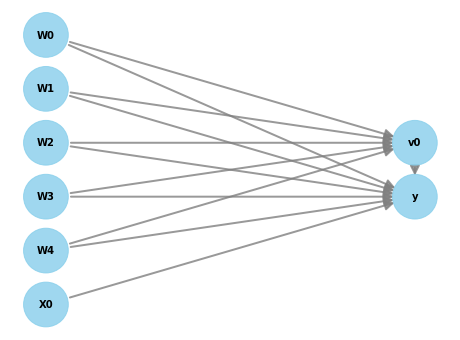

In [9]:
model.view_model()

In [10]:
#display(Image(filename="causal_model.png"))